<a href="https://colab.research.google.com/github/Digital1st/sol_price_model/blob/main/function_40_with_min_max_integer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.7444
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0227
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0028
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024
Epoc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn (TCN)                       │ (None, 32)             │        21,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,752 (260.75 KB)

 Trainable params: 22,250 (86.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,502 (173.84 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Next 10 predicted prices: [106.06445898 100.3121862  106.33098888 104.52930972 100.96393605
 100.10892791  94.13466906  93.33808804  95.90848602  89.86515491]
Next 10 predicted prices: [106.06445898 100.3121862  106.33098888 104.52930972 100.96393605
 100.10892791  94.13466906  93.33808804  95.90848602  89.86515491]
Max predicted price: 106.3309888794785
Min predicted price: 89.86515491442876


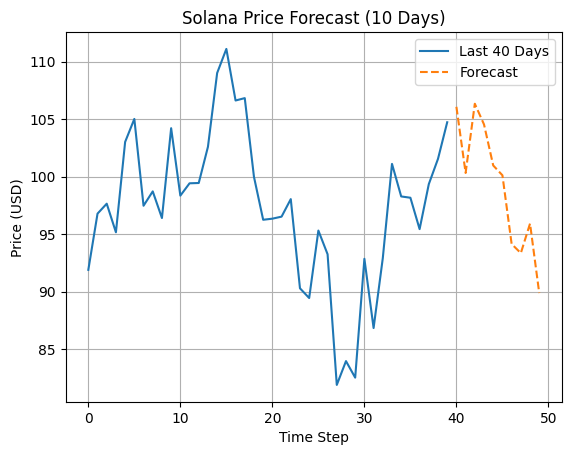

In [ ]:
# 📦 TCN Forecasting for Solana with Predict Function
!pip install -q yfinance keras-tcn tensorflow matplotlib

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

# 1. Download and normalize Solana price data
sol = yf.download("SOL-GBP", start="2021-01-01", interval="1d")
data = sol['Close'].dropna().values
data_min, data_max = data.min(), data.max()
data_norm = (data - data_min) / (data_max - data_min)

# 2. Create sliding windows
def create_windows(data, input_len=40, output_len=10, num_windows=1000):
    X, Y = [], []
    for i in range(num_windows):
        end = i + input_len
        out_end = end + output_len
        if out_end > len(data): break
        X.append(data[i:end])
        Y.append(data[end:out_end])
    return np.array(X)[..., np.newaxis], np.array(Y)

X, Y = create_windows(data_norm, 40, 10, 1000)

# 3. Build and train model
model = Sequential([
    TCN(input_shape=(40, 1), nb_filters=32, kernel_size=3, dilations=[1, 2, 4, 8]),
    Dense(10)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=20, batch_size=32, verbose=1)

# 4. Forecast function
def forecast_solana(prices_40):
    """Accepts 40 latest SOL prices → returns 10 predicted future prices"""
    assert len(prices_40) == 40, "You must pass exactly 40 values."
    norm = (np.array(prices_40) - data_min) / (data_max - data_min)
    x_input = norm.reshape(1, 40, 1)
    y_pred = model.predict(x_input)[0]
    return y_pred * (data_max - data_min) + data_min  # denormalize
model.summary()
# 5. Example usage
latest_40 = data[-40:]
predicted_10 = forecast_solana(latest_40)
print("Next 10 predicted prices:", predicted_10)
max_pred = np.max(predicted_10)
min_pred = np.min(predicted_10)

print("Next 10 predicted prices:", predicted_10)
print("Max predicted price:", max_pred)
print("Min predicted price:", min_pred)
# 6. Optional: Plot
plt.plot(range(40), latest_40, label="Last 40 Days")
plt.plot(range(40, 50), predicted_10, label="Forecast", linestyle="--")
plt.title("Solana Price Forecast (10 Days)")
plt.xlabel("Time Step")
plt.ylabel("Price (USD)")
plt.legend(); plt.grid(); plt.show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2022
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0080
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0047
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0038
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0032
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027
Epoc

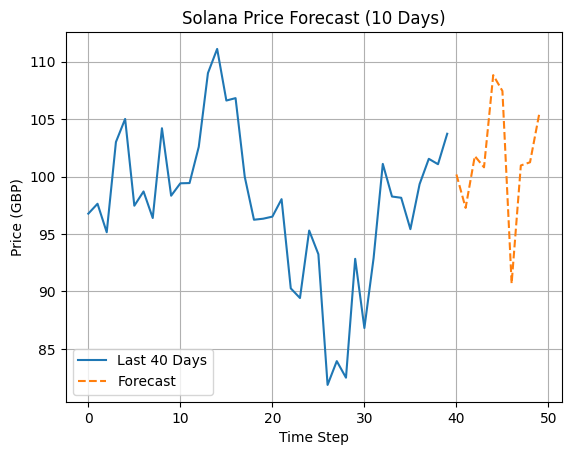

In [1]:
!pip install -q yfinance keras-tcn tensorflow matplotlib

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

# 1. Download and scale Solana price data
sol = yf.download("SOL-GBP", start="2021-01-01", interval="1d")
data = (sol['Close'].dropna().values * 100).astype(int)  # scale to integer cents
data_min, data_max = data.min(), data.max()
data_norm = (data - data_min) / (data_max - data_min)

# 2. Create sliding windows
def create_windows(data, input_len=40, output_len=10, num_windows=1000):
    X, Y = [], []
    for i in range(num_windows):
        end = i + input_len
        out_end = end + output_len
        if out_end > len(data): break
        X.append(data[i:end])
        Y.append(data[end:out_end])
    return np.array(X)[..., np.newaxis], np.array(Y)

X, Y = create_windows(data_norm, 40, 10, 1000)

# 3. Build and train model
model = Sequential([
    TCN(input_shape=(40, 1), nb_filters=32, kernel_size=3, dilations=[1, 2, 4, 8]),
    Dense(10)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=20, batch_size=32, verbose=1)

# 4. Forecast function
def forecast_solana(prices_40):
    """Accepts 40 latest SOL prices (int values * 100) → returns 10 predicted prices"""
    assert len(prices_40) == 40, "You must pass exactly 40 values."
    norm = (np.array(prices_40) - data_min) / (data_max - data_min)
    x_input = norm.reshape(1, 40, 1)
    y_pred = model.predict(x_input)[0]
    return (y_pred * (data_max - data_min) + data_min).round().astype(int)

# 5. Example usage
latest_40 = data[-40:]  # already in int format
predicted_10 = forecast_solana(latest_40)
print("Next 10 predicted prices (in cents):", predicted_10)
print("Max predicted price:", max(predicted_10))
print("Min predicted price:", min(predicted_10))

# 6. Optional: Plot (convert back to decimal for visual clarity)
plt.plot(range(40), np.array(latest_40)/100, label="Last 40 Days")
plt.plot(range(40, 50), np.array(predicted_10)/100, label="Forecast", linestyle="--")
plt.title("Solana Price Forecast (10 Days)")
plt.xlabel("Time Step")
plt.ylabel("Price (GBP)")
plt.legend(); plt.grid(); plt.show()